In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.ndimage import convolve
from scipy import signal
import h5py
import glob
import itertools

In [2]:
df = pd.read_csv('../data/result_1.csv')

In [3]:
df.head()

,contrast,SNR,AUC,w_size,Energy,filter,window
0,1.0,-58.244545,0.761324,1.0,2539.0,mean,1.0
1,1.0,-60.702938,0.676018,1.0,1683.0,mean,1.0
2,1.0,-49.872063,0.714362,1.0,4110.0,mean,1.0
3,1.0,-61.916410,0.701909,1.0,2123.0,mean,1.0
4,1.0,-50.698390,0.752092,1.0,4106.0,mean,1.0


In [13]:
## filtrando dados para visualizacao
filtro = ['mean']   ## somente filtros listados
window = [1,3]              ## somente nestas janelas

df_filt    = df[df.window.isin(window)]
pattern    = '|'.join(filtro)
df_filt    = df_filt[df_filt['filter'].str.contains(pattern)]
new_column = df_filt['filter']  + ', window = ' + df_filt['window'].astype('str') 
df_filt.drop(['filter','window'],axis = 1,inplace = True)
df_filt['ftype']  = new_column
df_filt.head()

,contrast,SNR,AUC,w_size,Energy,ftype
0,1.0,-58.244545,0.761324,1.0,2539.0,"mean, window = 1.0"
1,1.0,-60.702938,0.676018,1.0,1683.0,"mean, window = 1.0"
2,1.0,-49.872063,0.714362,1.0,4110.0,"mean, window = 1.0"
3,1.0,-61.916410,0.701909,1.0,2123.0,"mean, window = 1.0"
4,1.0,-50.698390,0.752092,1.0,4106.0,"mean, window = 1.0"


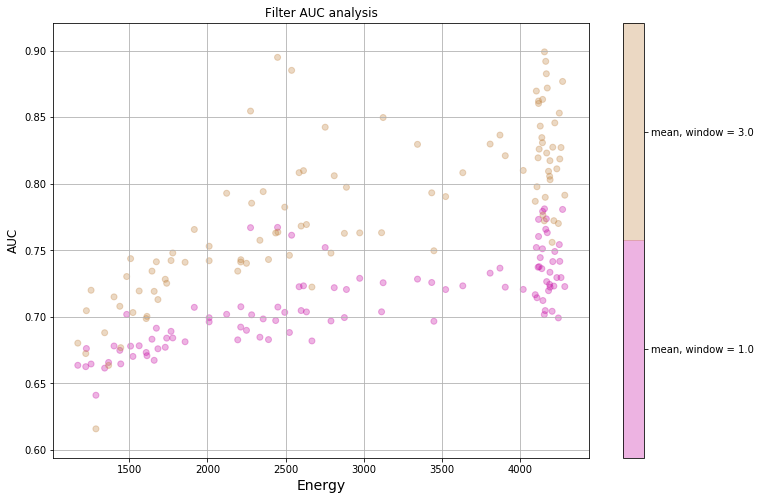

In [14]:
import matplotlib
fig         = plt.figure(figsize=(12,8))
x           = df_filt.Energy
y           = df_filt.AUC
label_name  = df_filt.ftype

## enconding labels
from sklearn import preprocessing
le          = preprocessing.LabelEncoder()
le.fit(label_name)
label       = le.transform(label_name)

## selecionando cores para plot de forma randomica
np.random.seed(10)
colors = np.random.rand(len(np.unique(label)),3)

## scatter plots pelas cores de cada classe (w)
plt.scatter(x, y, c=label, alpha=0.3,cmap=matplotlib.colors.ListedColormap(colors))

## ajustes do plot e barra de exibicao
plt.xlabel('Energy',fontsize = 14)
plt.ylabel('AUC',fontsize = 12)
plt.title('Filter AUC analysis')
plt.grid()
cb = plt.colorbar()
loc = np.arange(0,max(label),max(label)/float(len(colors)))
cb.set_ticks(loc+0.25)
## criando labels na colorbar
ticklabels = []
for i in np.unique(label_name):
    ticklabels.append(i)

cb.set_ticklabels(ticklabels)